In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 데이터 탐색 및 전처리

### 데이터 로드

In [4]:
file = "C:/Users/송이두/Desktop/가천대/2-1/인공지능개론/과제/data/heart.csv"
heart = pd.read_csv(file)

### 데이터 구조 확인

In [5]:
heart.shape

(303, 14)

In [6]:
#데이터셋 최상위 5행 출력
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
#데이터셋 전반적인 정보 출력
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#데이터셋 통계 정보 출력
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 결측치 확인

In [11]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 이상치 확인

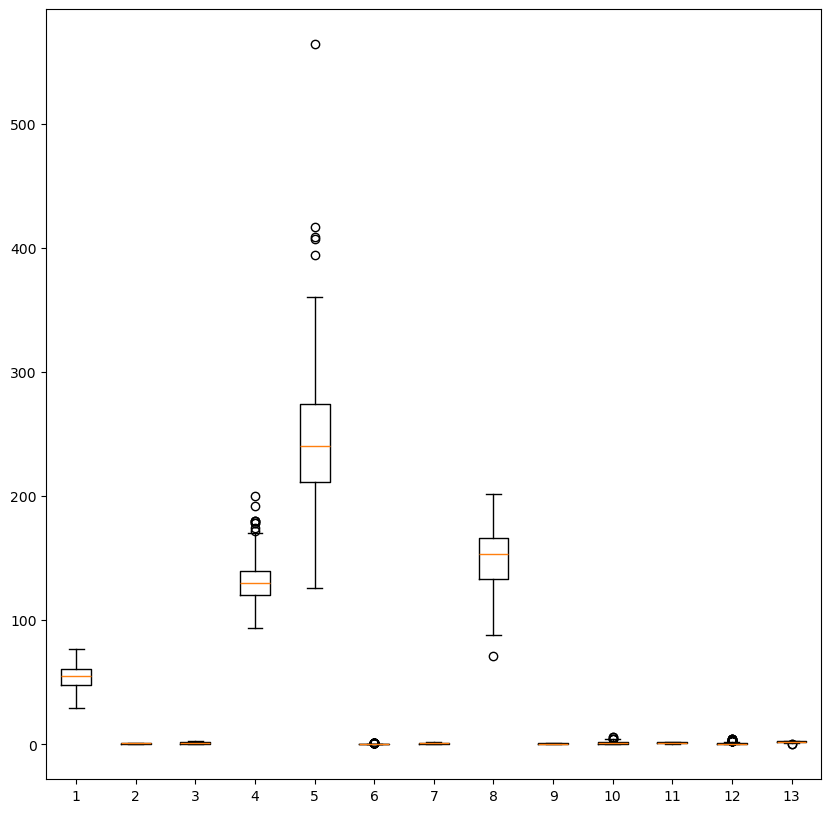

In [12]:
plt.figure(figsize=(10, 10))
plt.boxplot(heart.drop('target', axis=1).values)
plt.show()

### 이상치 제거

In [18]:
idx = set()
for index in heart[heart['trestbps'] > 180].index:
    idx.add(index)
    
for index in heart[heart['chol'] > 400].index:
    idx.add(index)

heart_filtered = heart.drop(idx)
heart_filtered.shape

(297, 14)

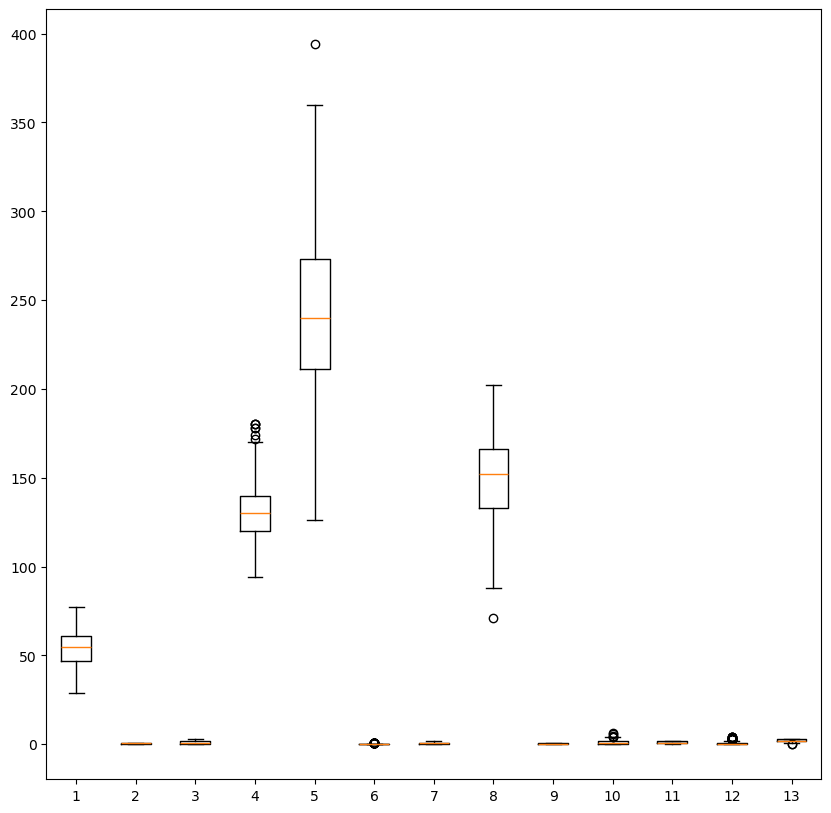

In [22]:
plt.figure(figsize=(10, 10))
plt.boxplot(heart_filtered.drop('target', axis=1).values)
plt.show()

### 데이터 스케일링

In [24]:
#X와 y 분리
X = heart_filtered.drop('target', axis=1)
y = heart_filtered['target'].copy()

X.shape, y.shape

((297, 13), (297,))

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X[:1], X_scaled[:1])
X.shape, X_scaled.shape

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   

   ca  thal  
0   0     1   [[ 0.96243365  0.66464094  1.96605814  0.82457302 -0.22412766  2.43042728
  -1.02648497  0.02292426 -0.69641941  1.12162946 -2.29134715 -0.70245674
  -2.13405417]]


((297, 13), (297, 13))

### 원-핫 인코딩

In [33]:
y = pd.get_dummies(y)

### 트레인, 테스트 분리

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237, 13), (60, 13), (237, 2), (60, 2))

In [35]:
type(X_train), type(y_train)

(numpy.ndarray, pandas.core.frame.DataFrame)

### 모델링

In [45]:
model = Sequential()

model.add(Dense(20,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

C:\Users\송이두\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,502 (9.77 KB)

 Trainable params: 2,502 (9.77 KB)

 Non-trainable params: 0 (0.00 B)

### 학습

In [46]:
N_EPOCHS = 30

model_history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.2)
y_pred = model.predict(X_test)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.5269 - loss: 0.7051 - val_accuracy: 0.4792 - val_loss: 0.6982
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6017 - loss: 0.6865 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6682 - loss: 0.6730 - val_accuracy: 0.5000 - val_loss: 0.6885
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6558 - loss: 0.6646 - val_accuracy: 0.5000 - val_loss: 0.6827
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6562 - loss: 0.6525 - val_accuracy: 0.5208 - val_loss: 0.6726
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6953 - loss: 0.6367 - val_accuracy: 0.6042 - val_loss: 0.6588
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6812 - loss: 0.6262 - val_accuracy: 0.6667 - val_loss: 0.6409
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7233 - loss: 0.6027 - val_accuracy: 0.7292 - val_loss: 0.6178

### 평가

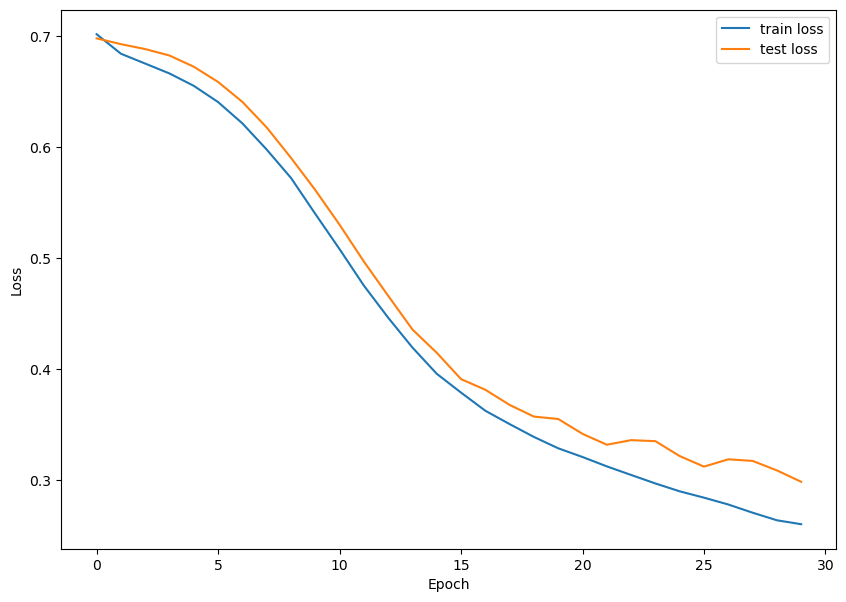

In [47]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.61      0.72        31
           1       0.68      0.90      0.78        29

    accuracy                           0.75        60
   macro avg       0.77      0.75      0.75        60
weighted avg       0.78      0.75      0.75        60

[[19 12]
 [ 3 26]]
